In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sociaal1 = pd.read_csv("CBS2016_woning_en_sociaal_1.csv").drop('Unnamed: 0', axis=1)
sociaal2 = pd.read_csv("CBS2012_2014_2016_woning_en_sociaal_2.csv").drop('Unnamed: 0', axis=1)

restaurant_df = pd.read_csv("ams_pc6_2016_AVRESTAU_cleaned.csv").drop('Unnamed: 0', axis=1)
school_df = pd.read_csv("ams_pc6_2016_AVSCHO_cleaned.csv").drop('Unnamed: 0', axis=1)
transport_df = pd.read_csv("ams_pc6_2016_AVTRANS_cleaned.csv").drop('Unnamed: 0', axis=1)
supermarkt = pd.read_csv("ams_pc6_2016AVSUPER_cleaned.csv").drop('Unnamed: 0', axis=1)

In [3]:
sociaal1 = sociaal1.drop(['bouwjaar_1000_1850', 'bouwjaar_1850_1905', 'bouwjaar_1905_1925',
       'bouwjaar_1925_1945', 'bouwjaar_1945_1955', 'bouwjaar_1955_1965',
       'bouwjaar_1965_1975', 'bouwjaar_1975_1985', 'bouwjaar_1985_1995',
       'bouwjaar_1995_2005', 'bouwjaar_2005_hoger', 'bouwjaar_onbekend','woningvoorraad','AANTAL_HH', 'TOTHH_EENP', 'GEM_HH_GR'], axis=1)

sociaal2 = sociaal2.drop(['M_INKHH', 'UITKMINAOW', 'inwoners', 'mannen',
       'vrouwen', 'lft_0_14', 'lft_15_24', 'lft_25_44', 'lft_45_64',
       'lft_65_74', 'lft_75plus', 'particulier_hh',
       'eenpers_hh', 'meerpers_hh', 'eenoud_hh', 'tweeoud_hh','huishoudgrootte'], axis=1)

df = pd.merge(sociaal1, sociaal2, on='PC6')

df = df.replace({'UITKMINAOW': {'20-80 onder midden tot boven midden':7}})
df['UITKMINAOW'] = pd.to_numeric(df['UITKMINAOW'])

In [4]:
df = df.rename(columns={"M_INKHH": "INCOME", "UITKMINAOW": "BENEFITS", "gem_WOZwaarde_klas": "WOZ", "nwallochtonen_klas":"NWA"})

In [5]:
df = df.drop(["G_GAS_WON", "G_ELEK_WON"], axis = 1)

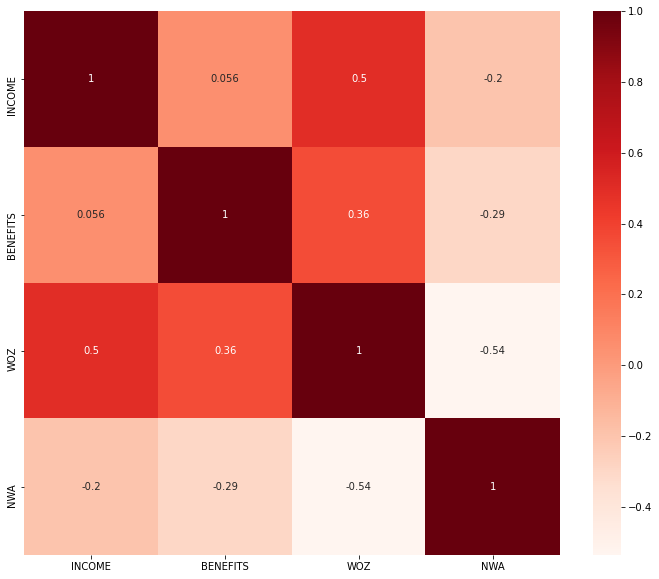

In [6]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["M_INKHH"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

M_INKHH               1.000000
gem_WOZwaarde_klas    0.498182
Name: M_INKHH, dtype: float64

In [15]:
cor_target = abs(cor["gem_WOZwaarde_klas"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

M_INKHH               0.498182
UITKMINAOW            0.357386
G_GAS_WON             0.510245
G_ELEK_WON            0.290506
gem_WOZwaarde_klas    1.000000
nwallochtonen_klas    0.536194
Name: gem_WOZwaarde_klas, dtype: float64

In [16]:
print(df[["M_INKHH","nwallochtonen_klas"]].corr())
print(df[["M_INKHH","G_GAS_WON"]].corr())
print(df[["M_INKHH","UITKMINAOW"]].corr())

                     M_INKHH  nwallochtonen_klas
M_INKHH             1.000000           -0.199703
nwallochtonen_klas -0.199703            1.000000
           M_INKHH  G_GAS_WON
M_INKHH    1.00000   -0.11937
G_GAS_WON -0.11937    1.00000
             M_INKHH  UITKMINAOW
M_INKHH     1.000000    0.056118
UITKMINAOW  0.056118    1.000000


In [17]:
df2 = pd.merge(supermarkt, transport_df, on='PC6')
df2 = pd.merge(df2, school_df, on='PC6')
df2 = pd.merge(df2, restaurant_df, on='PC6')
df2.columns

Index(['PC6', 'AV1_SUPERM', 'AV3_SUPERM', 'AV5_SUPERM', 'AFS_OPRIT',
       'AFS_TRNOVS', 'AFS_TREINS', 'AFS_ONDBAS', 'AV1_ONDBAS', 'AV3_ONDBAS',
       'AV5_ONDBAS', 'AFS_ONDHV', 'AV3_ONDHV', 'AV5_ONDHV', 'AV10_ONDHV',
       'AFS_ONDVMB', 'AV3_ONDVMB', 'AV5_ONDVMB', 'AV10ONDVMB', 'AFS_ONDVRT',
       'AV3_ONDVRT', 'AV5_ONDVRT', 'AV10ONDVRT', 'AFS_RESTAU', 'AV1_RESTAU',
       'AV3_RESTAU', 'AV5_RESTAU'],
      dtype='object')

In [18]:
df2['avg_supermarket_distance'] = df2[['AV1_SUPERM', 'AV3_SUPERM', 'AV5_SUPERM']].mean(axis=1)
df2['avg_restaurant_distance'] = df2[['AFS_RESTAU', 'AV1_RESTAU','AV3_RESTAU', 'AV5_RESTAU']].mean(axis=1)
df2['avg_basisonderwijs_distance'] = df2[['AFS_ONDBAS','AV1_ONDBAS', 'AV3_ONDBAS','AV5_ONDBAS']].mean(axis=1)
df2['avg_havoOnderwijs_distance'] = df2[['AFS_ONDHV', 'AV3_ONDHV', 'AV5_ONDHV', 'AV10_ONDHV']].mean(axis=1)
df2['avg_ONDVMB_distance'] = df2[['AFS_ONDVMB', 'AV3_ONDVMB', 'AV5_ONDVMB', 'AV10ONDVMB']].mean(axis=1)
df2['avg_ONDVRT_distance'] = df2[['AFS_ONDVRT','AV3_ONDVRT', 'AV5_ONDVRT', 'AV10ONDVRT']].mean(axis=1)

df2 = df2.drop(['AV1_SUPERM', 'AV3_SUPERM', 'AV5_SUPERM','AFS_RESTAU', 'AV1_RESTAU','AV3_RESTAU', 'AV5_RESTAU','AFS_ONDBAS','AV1_ONDBAS', 'AV3_ONDBAS','AV5_ONDBAS','AFS_ONDHV', 'AV3_ONDHV', 'AV5_ONDHV', 'AV10_ONDHV','AFS_ONDVMB', 'AV3_ONDVMB', 'AV5_ONDVMB', 'AV10ONDVMB','AFS_ONDVRT','AV3_ONDVRT', 'AV5_ONDVRT', 'AV10ONDVRT'],axis=1)

In [19]:
df3 = pd.merge(df, df2, on='PC6')

In [20]:
df3.columns

Index(['PC6', 'M_INKHH', 'UITKMINAOW', 'G_GAS_WON', 'G_ELEK_WON',
       'gem_WOZwaarde_klas', 'nwallochtonen_klas', 'AFS_OPRIT', 'AFS_TRNOVS',
       'AFS_TREINS', 'avg_supermarket_distance', 'avg_restaurant_distance',
       'avg_basisonderwijs_distance', 'avg_havoOnderwijs_distance',
       'avg_ONDVMB_distance', 'avg_ONDVRT_distance'],
      dtype='object')

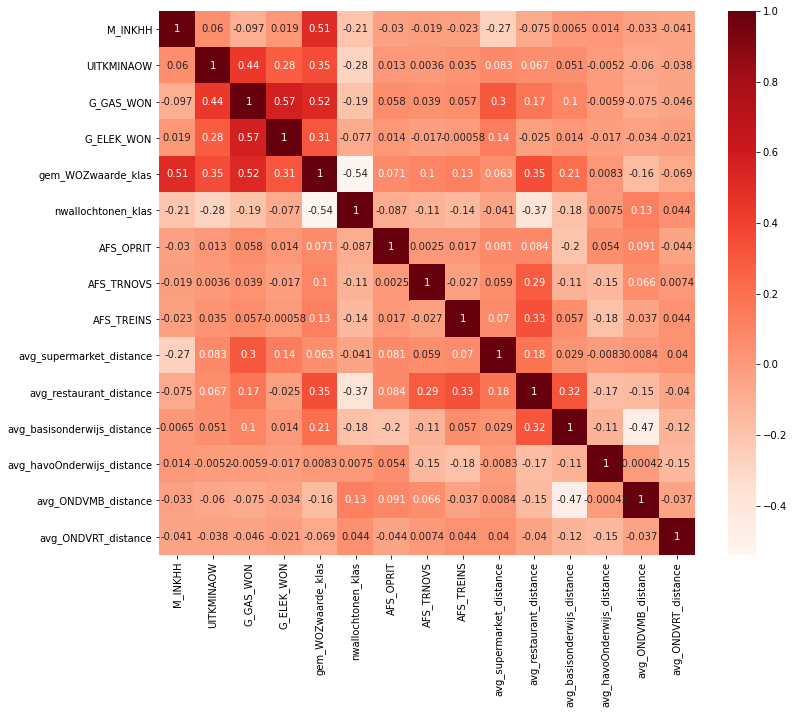

In [21]:
plt.figure(figsize=(12,10))
cor = df3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [158]:
cor_target = abs(cor["gem_WOZwaarde_klas"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

M_INKHH                        0.512893
UITKMINAOW                     0.353227
G_GAS_WON                      0.519610
G_ELEK_WON                     0.313082
gem_WOZwaarde_klas             1.000000
nwallochtonen_klas             0.538979
avg_restaurant_distance        0.350043
avg_basisonderwijs_distance    0.210605
Name: gem_WOZwaarde_klas, dtype: float64

In [159]:
cor_target = abs(cor["M_INKHH"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

M_INKHH                     1.000000
gem_WOZwaarde_klas          0.512893
nwallochtonen_klas          0.206066
avg_supermarket_distance    0.266131
Name: M_INKHH, dtype: float64